# Assignment 3.Exercise 3: Hand Writing digit recognition

I used "Mastering Machine Learning with Scikit-learn" book written by "Gavin Hackeling" "https://tanthiamhuat.files.wordpress.com/2018/04/mastering-machine-learning-with-scikit-learn.pdf" Chapter 9, page 179, Topic: "Classifying handwriting digits".

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
import matplotlib.cm as cm
import warnings; warnings.simplefilter('ignore')

First, I load the data.scikit-learn provides the fetch-mldata convenience function to download the data set if it is not found on disk,and read it intto an object.

In [11]:
digits= fetch_mldata('MNIST original', data_home='data/mnist').data

I create a subplot for five instance for the digits zero, one and two. The script produces the following figure:

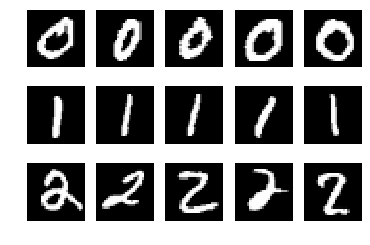

In [12]:
counter =1
for i in range(1,4):
    for j in range(1,6):
        plt.subplot(3,5, counter)
        plt.imshow(digits[(i-1)* 8000 + j].reshape((28, 28)), cmap=cm.Greys_r)
        plt.axis('off')
        counter+=1
plt.show()        

In [4]:
from sklearn.datasets import fetch_mldata
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

The script will fork additional processes during grid search. We then split the processed data into training and test sets using the 'train_test_split'.

In [13]:
data= fetch_mldata('MNIST original', data_home='data/mnist')
X = data.data
y = data.target
X = X/255.0*2 -1
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Hyperparameters tuning 

In Support Vectpr Machines, the estimator requires more hyperparameters than most of the others. The most interesting hyperparameters for SVC are set by kernel, gamma and C keyword argumets. Setting these hyperparameters can be challenging, I tune them by grid searching with the following code:

In [14]:
pipeline = Pipeline([('clf', SVC(kernel = 'rbf', gamma = 0.01, C=100))])
print(X_train.shape)

(52500, 784)


In [15]:
parameters = {
    'clf__gamma': (0.01, 0.03, 0.1, 0.3, 1),
    'clf__C': (0.1, 0.3, 1, 3, 10, 30),
}

It takes 1 hour and 40 minutes to run :( . Note that you don't need to run this, just load model in 'modelExe3MNIST.dat'.

In [16]:
grid_search = GridSearchCV(pipeline, parameters, n_jobs=2, verbose=1, scoring='accuracy')
grid_search.fit(X_train[:10000], y_train[:10000])

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 76.6min
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed: 124.0min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('clf', SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'clf__gamma': (0.01, 0.03, 0.1, 0.3, 1), 'clf__C': (0.1, 0.3, 1, 3, 10, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

### Presistence model 

In [20]:
import pickle
name = 'modelExe3MNIST.dat'

with open(name, 'wb') as f:
    pipeline = pickle.dump(grid_search, f)

### Load model 

In [22]:
def load_ml():
    with open('modelExe3MNIST.dat', 'rb') as f:
        model = pickle.load(f)
    return model

### Performance and Evaluation on MNIST dataset 

In [23]:
print('Best score: %0.3f' % grid_search.best_score_)
print('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

Best score: 0.963
Best parameters set:
clf__C: 3
clf__gamma: 0.01


### Classification report 

It take 3 minutes

In [24]:
prediction = grid_search.predict(X_test)
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1704
         1.0       0.98      0.98      0.98      1977
         2.0       0.95      0.98      0.97      1750
         3.0       0.97      0.95      0.96      1790
         4.0       0.96      0.98      0.97      1691
         5.0       0.96      0.97      0.97      1559
         6.0       0.98      0.98      0.98      1709
         7.0       0.97      0.97      0.97      1872
         8.0       0.95      0.96      0.96      1658
         9.0       0.97      0.95      0.96      1790

   micro avg       0.97      0.97      0.97     17500
   macro avg       0.97      0.97      0.97     17500
weighted avg       0.97      0.97      0.97     17500



In [25]:
grid_search.cv_results_

{'mean_fit_time': array([ 92.76297077, 141.83472625, 148.54124975, 150.2727704 ,
        149.33556755,  66.81070439, 145.15126681, 149.38446768,
        151.64736199, 152.21985006,  36.83951871,  78.9554019 ,
         80.31081533,  82.41776681,  80.20580928,  35.76757701,
         78.07494378,  81.97950315,  82.25438293,  82.22026658,
         37.70005242,  78.61553248,  81.900606  ,  82.0171771 ,
         81.24399765,  38.33362126,  78.87922327,  78.672743  ,
         77.94420028,  79.27821438]),
 'std_fit_time': array([2.8182771 , 1.18261088, 1.53275583, 0.86067539, 0.84046882,
        0.70488666, 0.71608723, 1.31330536, 0.4192218 , 2.14983305,
        1.03279048, 0.46149823, 0.13249463, 1.32031392, 1.69002262,
        0.33578226, 1.36205215, 0.93831547, 0.89605946, 0.34816705,
        0.75721495, 0.83867856, 0.62787243, 0.33461999, 0.87328949,
        1.3181745 , 1.08602953, 0.6445953 , 0.06198896, 1.22783424]),
 'mean_score_time': array([31.04990983, 35.94058371, 38.17996995, 37.19